In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_moons

In [10]:
X,y=make_moons(100,noise=0.25,random_state=12)

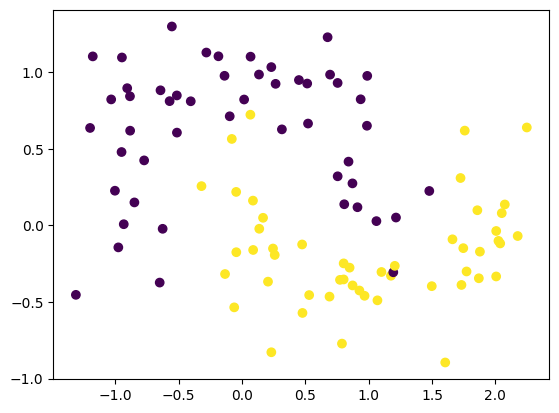

In [18]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [21]:
#Model
Model=Sequential()

Model.add(Dense(128,activation="relu",input_dim=2))
Model.add(Dense(128,activation="relu"))
Model.add(Dense(1,activation="sigmoid"))


Model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam=Adam(learning_rate=0.01)
Model.compile(optimizer=adam,loss="binary_crossentropy",metrics=["Accuracy"])
history=Model.fit(X,y,epochs=2000,validation_split=0.2)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - Accuracy: 1.0000 - loss: 3.0670e-06 - val_Accuracy: 0.8500 - val_loss: 2.4799
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Accuracy: 1.0000 - loss: 6.4451e-05 - val_Accuracy: 0.8500 - val_loss: 3.2056
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Accuracy: 1.0000 - loss: 0.0072 - val_Accuracy: 0.9000 - val_loss: 2.0340
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - Accuracy: 0.9937 - loss: 0.0068 - val_Accuracy: 0.8500 - val_loss: 2.7108
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Accuracy: 1.0000 - loss: 0.0014 - val_Accuracy: 0.8500 - val_loss: 3.5955
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Accuracy: 1.0000 - loss: 1.0628e-04 - val_Accuracy: 0.9000 - val_loss: 2.8909
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Accuracy: 0.9937 - loss: 0.0073 - val_Accuracy: 0.9000 - val_loss: 2.2198
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Accuracy: 0.9937 - loss: 0.0225 - val_Accuracy

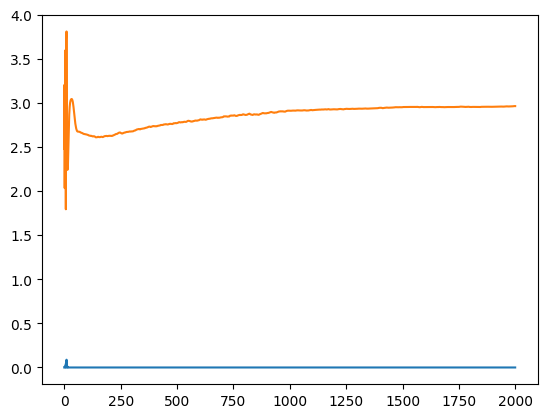

In [32]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 959us/step


<Axes: >

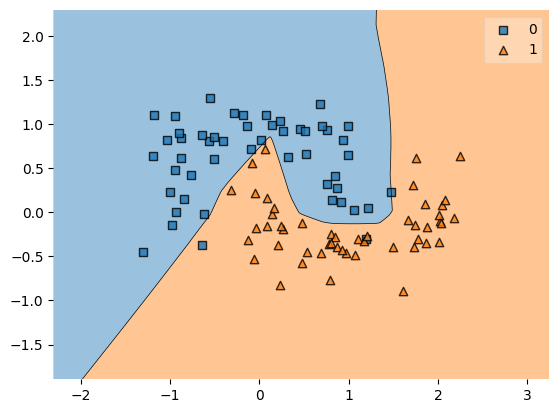

In [27]:
#plot the model predition via mlxtend
plot_decision_regions(X,y,clf=Model)
plt.show()

In [34]:
#Now the Model2
Model2=Sequential()

Model2.add(Dense(128,activation="relu",input_dim=2,kernel_regularizer=tensorflow.keras.regularizers.L2(0.03)))
Model2.add(Dense(128,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.L2(0.03)))
Model2.add(Dense(1,activation="sigmoid"))

Model2.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
Model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
History=Model2.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 947us/step


<Axes: >

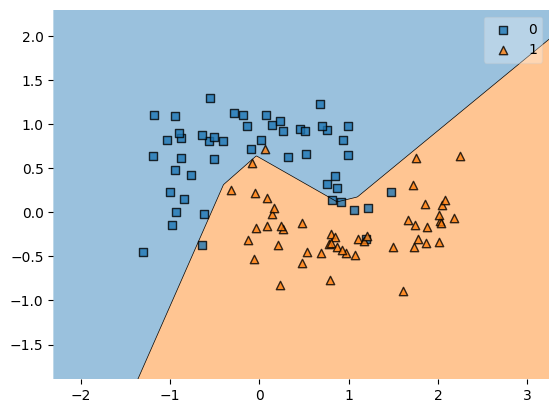

In [40]:
plot_decision_regions(X,y,clf=Model2)

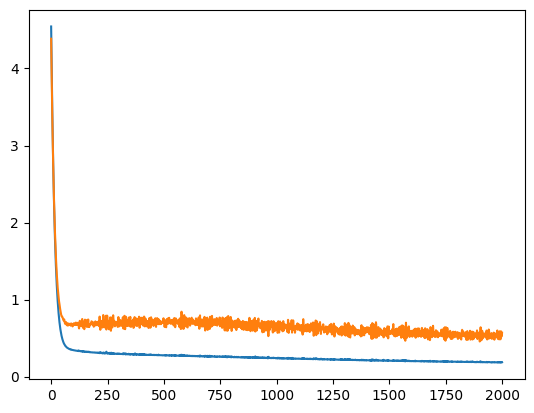

In [41]:
plt.plot(History.history["loss"])
plt.plot(History.history["val_loss"])
plt.show()